<a href="https://colab.research.google.com/github/carolreine/python-study/blob/main/Imers%C3%A3o_Python_Aula_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 04 - Candlestick

In [1]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31') #toda ação brasileira tem .SA no Yahoo Finance
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [4]:
dados.columns #visualizar as colunas

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Fech_Adj','Volume'] #altera todas as colunas

In [6]:
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Adj,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


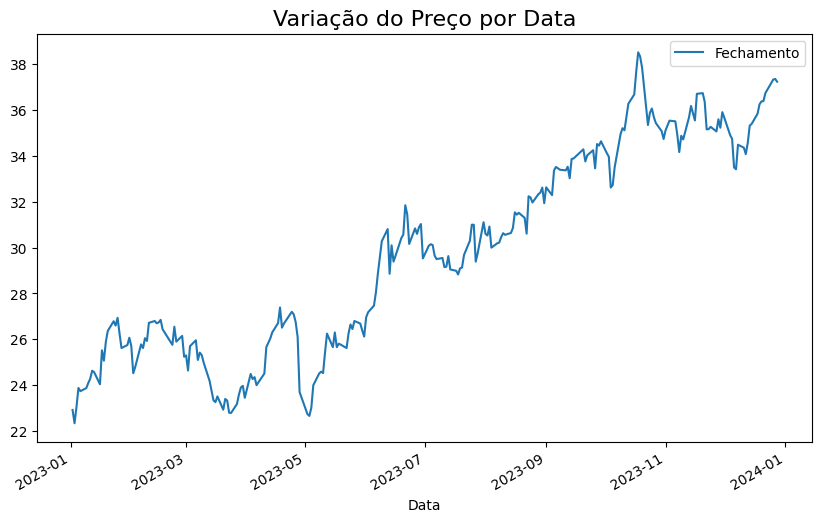

In [7]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do Preço por Data', fontsize=16)
plt.legend(['Fechamento'])

In [8]:
df = dados.head(60).copy()
#converter o indice em uma coluna de data
df['Data'] = df.index
#Convertendo as datas para o formato numérico de matplotlib
#para o matplotlib plotar as datas corretamente
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maximo,Minimo,Fechamento,Fech_Adj,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443508,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613497,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030733,58130000,19369.0


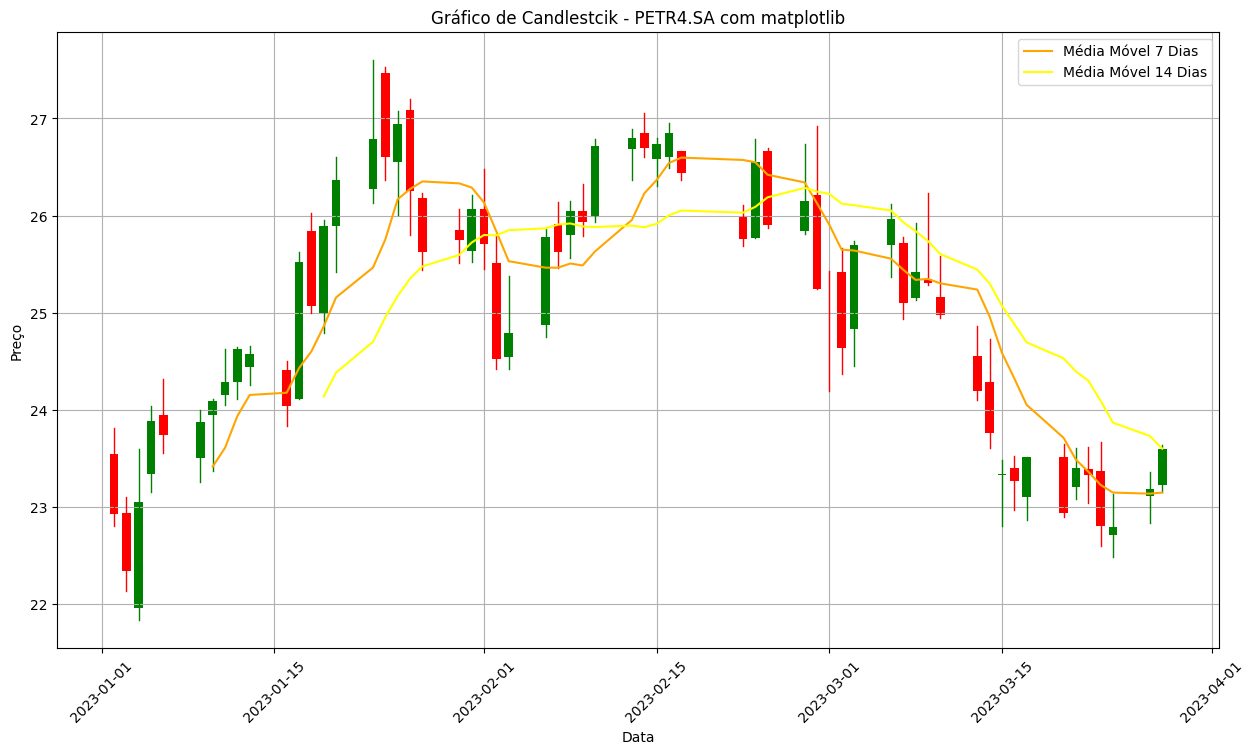

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
width = 0.7

for i in range(len(df)):
  #determinar a cor do candle, se o preço de fechamento for > abertura candle = verde (valorizou)
  # se fechamento < abertura, vermelho (desvalorizou)
  if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
    color = 'green'
  else:
    color = 'red'

  # desenhar a linha vertical do candle (mecha)
  # essa linha mostra o preço maximo (topo da linha) e mínimo (base da linha) do dia
  # Usamos ax.plot para desenhar uma linha vertical
  ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
          [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
          color=color,
          linewidth=1)

  # adicionar o retângulo. (x,y)
  ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                             width, #definido lá em cima
                             abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]), # diferença absoluta
                             facecolor=color))


df['MA7'] = df['Fechamento'].rolling(window=7).mean() # "rola" de 7 em 7 linhas
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')
# Adiciona legendas para as médias móveis
ax.legend()

# Formatar eixo x para mostrar datas
# Configurar o formato da data e rotação para leitura
ax.xaxis_date() # o método diz a Matplotlib que são datas
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionar título e rótulos para x e y
plt.title('Gráfico de Candlestcik - PETR4.SA com matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

# Adiciona Grid
plt.grid(True)

# Exibir o gráfico
plt.show()

In [16]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [17]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31') #toda ação brasileira tem .SA no Yahoo Finance

[*********************100%%**********************]  1 of 1 completed


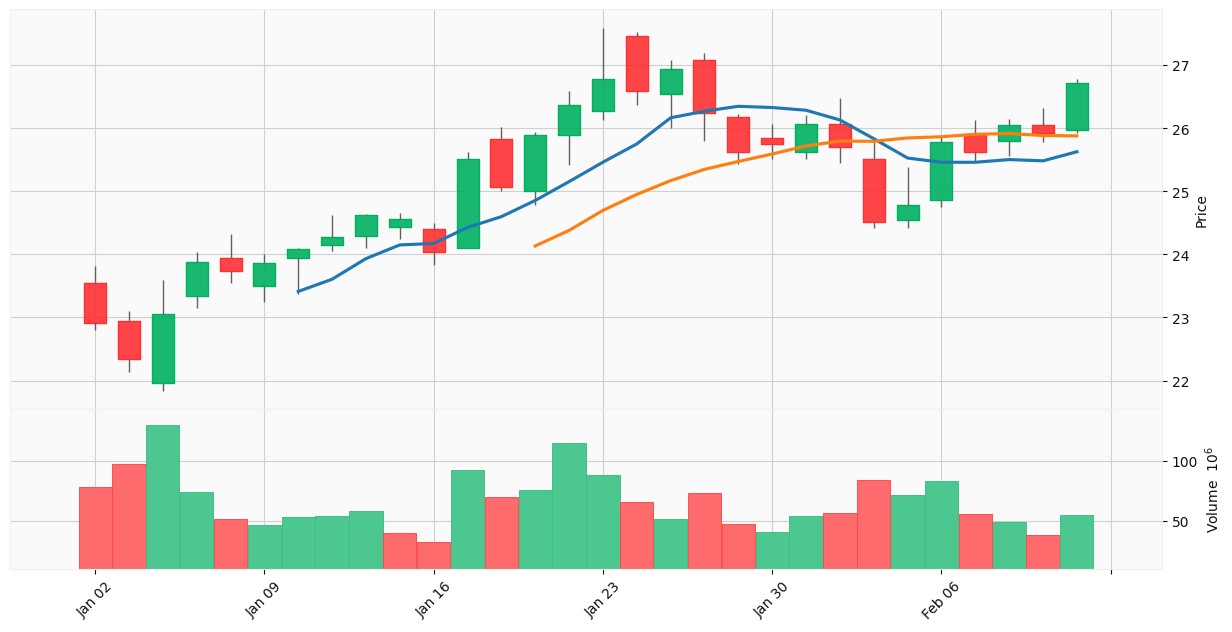

In [18]:
# jeito mais simples
# volume = grafico de barras de baixo
# mav = moving average / média móvel
mpf.plot(dados.head(30),type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')

In [19]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31') #Yahoo Finance

[*********************100%%**********************]  1 of 1 completed


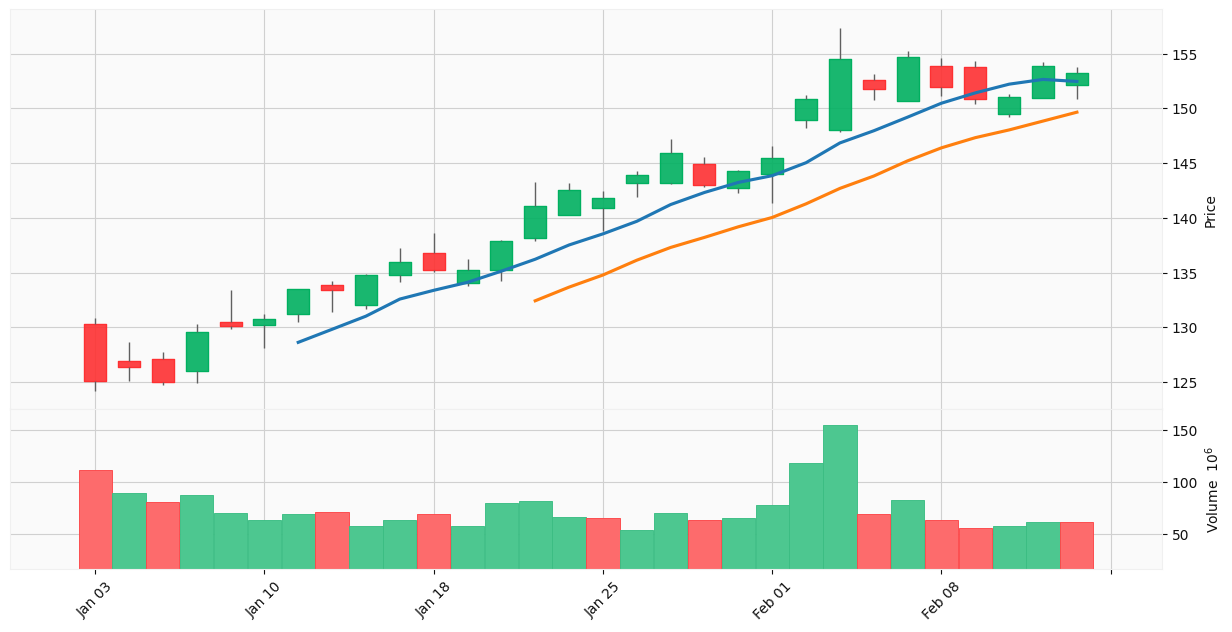

In [20]:
mpf.plot(dados.head(30),type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')